# Data Visualization with Python using Matplotlib, Pandas, and Seaborn

Dataset Source: https://www.kaggle.com/datasets/kanchana1990/2024-amazon-best-sellers-top-valentine-gifts

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy a

In [3]:
#Read the data and check the data header
df = pd.read_csv('valentines_best_sellers.csv')
df.head()

,title,brand,description,starsBreakdown/3star,starsBreakdown/4star,starsBreakdown/5star,reviewsCount,price,price/currency,price/value,categoryPageData/productPosition
0,"Ferrero Rocher, 24 Count, Premium Milk Chocola...",Ferrero Rocher,Ferrero Rocher's milk chocolate gift box offer...,0.02,0.07,0.89,20021.0,NaN,$,11.39,7
1,"HERSHEY'S NUGGETS Assorted Chocolate, Valentin...",HERSHEY'S,This HERSHEY'S NUGGETS candy assortment is fil...,0.03,0.10,0.84,18891.0,NaN,$,10.69,16
2,LEGO Icons Flower Bouquet Building Decoration ...,LEGO,Giving and receiving beautiful flowers is such...,0.01,0.05,0.92,19395.0,NaN,$,47.99,2
3,BodyRefresh Shower Steamers Aromatherapy - 8 P...,BodyRefresh,NaN,0.07,0.15,0.67,593.0,NaN,$,9.99,10
4,JoJowell Shower Steamers Aromatherapy - 21Pcs ...,JoJowell,NaN,0.10,0.15,0.63,816.0,NaN,$,21.99,11


## Dataset Characteristics

In [4]:
#Checking the size and data types of the file

# Display the size of the data
print(df.shape)

# Display column names and data types
print(df.dtypes)


(218, 11)
title                                object
brand                                object
description                          object
starsBreakdown/3star                float64
starsBreakdown/4star                float64
starsBreakdown/5star                float64
reviewsCount                        float64
price                               float64
price/currency                       object
price/value                         float64
categoryPageData/productPosition      int64
dtype: object


In [5]:
# understanding of the data
(df.isnull().sum() / df.shape[0])*100

title                                 0.000000
brand                                 0.458716
description                          78.899083
starsBreakdown/3star                  0.000000
starsBreakdown/4star                  0.000000
starsBreakdown/5star                  0.000000
reviewsCount                          0.917431
price                               100.000000
price/currency                       22.477064
price/value                          22.477064
categoryPageData/productPosition      0.000000
dtype: float64

## Data Cleaning

In [6]:
#Dropping columns with more than 40% null values
df.drop(["description"],axis = 1, inplace = True, errors='ignore')

df.columns

df.drop(["price"],axis = 1, inplace = True, errors='ignore')

df.columns

Index(['title', 'brand', 'starsBreakdown/3star', 'starsBreakdown/4star',
       'starsBreakdown/5star', 'reviewsCount', 'price/currency', 'price/value',
       'categoryPageData/productPosition'],
      dtype='object')

In [7]:
df.isnull().sum()
df.shape

(218, 9)

In [8]:
# Data Cleaning

# Renaming columns for better clarity
df = df.rename(columns={'price/currency': 'currency', 'price/value': 'price'})

# Replacing null values for currency with $
df['currency'] = df['currency'].fillna('$')

# Replacing null values for price with mean values
mean_price = df['price'].mean()
df['price'].fillna(mean_price, inplace=True)

# Deleting the rows where the brand name is null
df.dropna(subset=['brand'], inplace=True)

# Replacing null values for reviewCount with median values 
median_reviewsCount = df['reviewsCount'].median()
df['reviewsCount'].fillna(median_reviewsCount, inplace=True)


df.shape
df.isnull().sum()



title                               0
brand                               0
starsBreakdown/3star                0
starsBreakdown/4star                0
starsBreakdown/5star                0
reviewsCount                        0
currency                            0
price                               0
categoryPageData/productPosition    0
dtype: int64

In [12]:
#Checking for unique brands
unique_brands = df['brand'].nunique()
print(f"There are {unique_brands} brands available in the data")

There are 168 brands available in the data


## Question 1: What is the spending pattern of individuals for Valentine's?

/tmp/ipykernel_63/1276499779.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_counts = df.groupby(price_bins)['price'].count()


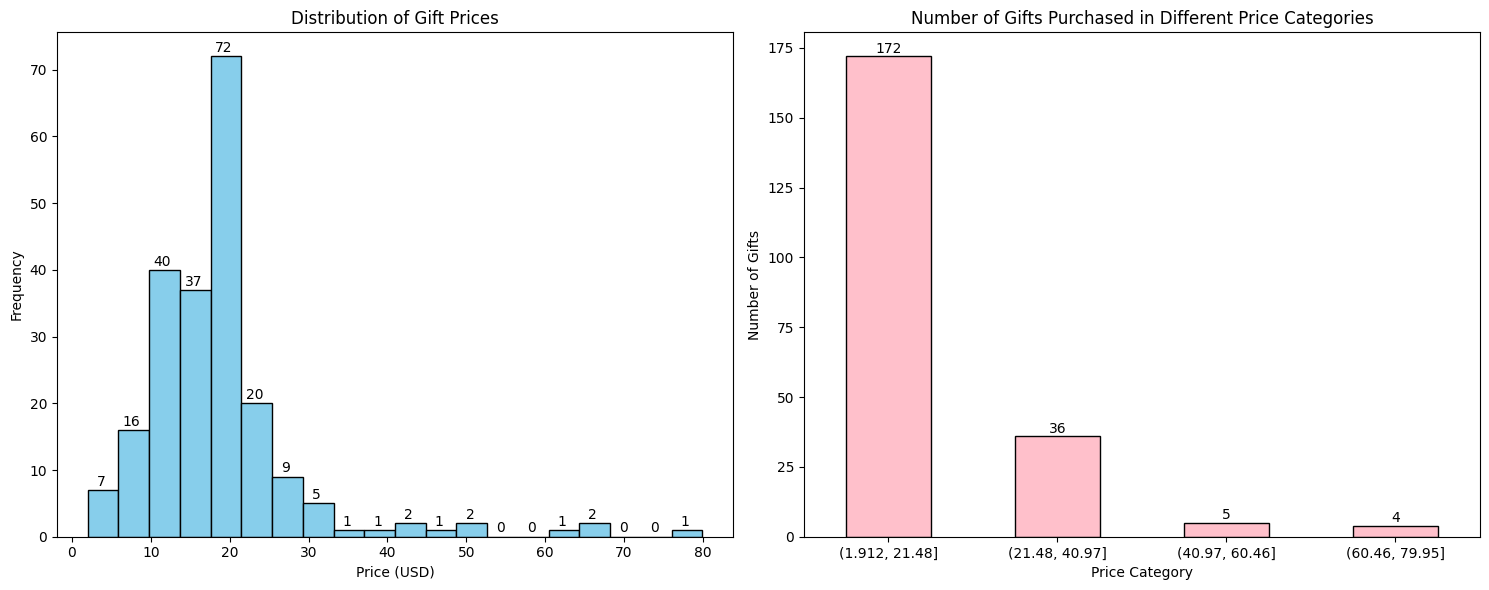

In [56]:
plt.figure(figsize=(15, 6))

# Plot the distribution of gift prices
plt.subplot(1, 2, 1)
hist_values, hist_bins, _ = plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Gift Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')


for value, bin_edge in zip(hist_values, hist_bins[:-1]):
    plt.text(bin_edge+1.7, value+0.2, str(int(value)), ha='center', va='bottom')

# Divide the price range into 4 equal parts
price_bins = pd.cut(df['price'], bins=4)

# Count the number of gifts in each price range category
price_range_counts = df.groupby(price_bins)['price'].count()

# Plot the Number of Gifts Purchased in Different Price Categories
plt.subplot(1, 2, 2)
bars = price_range_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Number of Gifts Purchased in Different Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Number of Gifts')
plt.xticks(rotation=0)

for index, value in enumerate(price_range_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Question 2: Products in which price range get the maximum ratings and reviews?

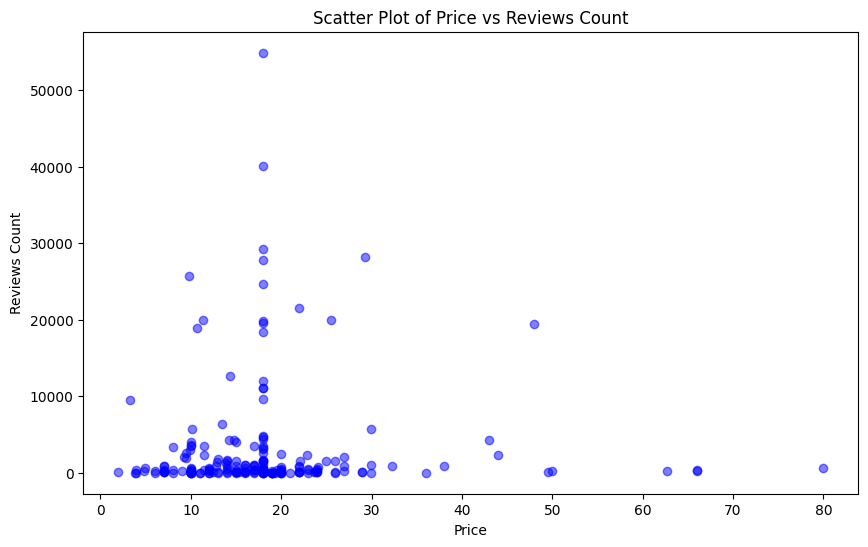

In [9]:
#Scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['reviewsCount'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Price vs Reviews Count')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

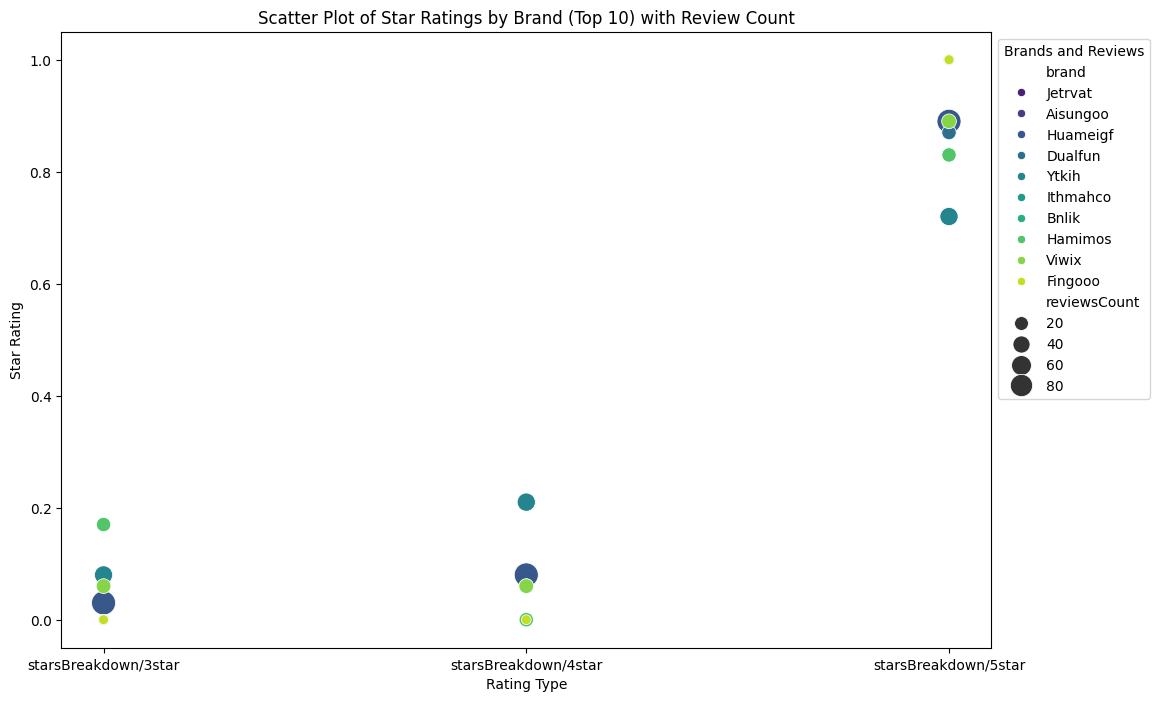

In [51]:
# Rating wise Scatter Plot

rating_columns = ['starsBreakdown/3star', 'starsBreakdown/4star', 'starsBreakdown/5star']

# Calculate average ratings and review count for each brand
average_ratings_by_brand = df.groupby('brand')[rating_columns + ['reviewsCount']].mean()
average_ratings_by_brand['average_rating'] = average_ratings_by_brand[rating_columns].mean(axis=1)
top_10_brands = average_ratings_by_brand.nlargest(10, 'average_rating').index
filtered_df = df[df['brand'].isin(top_10_brands)]
melted_df = filtered_df.melt(id_vars=['brand', 'reviewsCount'], value_vars=rating_columns, var_name='Rating Type', value_name='Rating')

# Plot a scatter plot with review count on the y-axis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Rating Type', y='Rating', hue='brand', size='reviewsCount', data=melted_df, palette='viridis', sizes=(50, 300))
plt.title('Scatter Plot of Star Ratings by Brand (Top 10) with Review Count')
plt.xlabel('Rating Type')
plt.ylabel('Star Rating')
plt.legend(title='Brands and Reviews', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Conclusion

## Spending Patterns
- The analysis reveals that a significant portion of the dataset indicates that most people prefer spending less than 20 dollars on Valentine's gifts.
- Interestingly, there is a noticeable drop in the number of individuals who spend up to 80 dollars, suggesting that higher-value purchases are less common.

## Relationship between Brand Ratings and Reviews
- Brands that consistently receive 5-star ratings tend to attract more reviews on average.
- This positive correlation suggests that high-rated brands are more likely to engage customers, resulting in a higher number of reviews.

In summary, the data suggests a trend of moderate spending for Valentine's gifts, with a preference for items priced under $20. Additionally, brands with excellent 5-star ratings tend to receive more reviews, indicating a positive relationship between customer satisfaction and engagement.